## Linear Regression

Linear regression is a fundamental machine learning algorithm used for predicting a continuous target variable based on one or more input features. It is a supervised learning algorithm used for predicting a continuous output based on input features.

It assumes a linear relationship between input variables and the target variable. It's a suitable choice when you have a dataset with numerical features and a continuous target variable.

### Case Study: 

We will be building a linear regression model that will predict the median value of homes in boston. We already have access to the dataset, and here are details on the columns of the dataset.

CRIM - Per capital crime rate by town

ZN - Proportion of residential land zoned for lots over 25,000 s1.ft.

INDUS - Proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; o otherwise)

NOX -  Nitric oxides concentration (parts per 10 million) (parts/10M)

RM - Average numbers of rooms per dwelling.

AGE - Proportion of owner-occupied units built prior to 1940.

DIS - Weighted distances to five Boston employment centers

RAD - Index of accessibility to radial highways.

TAX - Full value property tax rate per 10,000 ($/10k)

PTRATIO - Pupil teacher ratio by town

B - Result of the equation B = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSAT - Percentage of lower status of the population.

MEDV - Median value of owner-occupied homes in 1000 dollars.

In [64]:
# Step 1: Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

* numpy (np): NumPy is a fundamental library for numerical operations in Python. It provides support for arrays and matrices, making it essential for handling data in machine learning.

* pandas (pd): Pandas is a data manipulation library that simplifies data handling, storage, and analysis. It is widely used for working with datasets in machine learning.

* matplotlib.pyplot (plt): Matplotlib is a popular data visualization library in Python. It is often used to create various types of plots and charts to visualize data.

* seaborn (sns): Seaborn is built on top of Matplotlib and offers a high-level interface for creating aesthetically pleasing statistical graphics. It's often used for data visualization and exploratory data analysis.

* plotly.express (px): Plotly is a library for interactive data visualization. Plotly Express simplifies the process of creating interactive plots and charts for better data exploration and presentation.

* sklearn.model_selection: Scikit-learn (or sklearn) is a comprehensive machine learning library. The model_selection submodule provides tools for splitting data into training and testing sets, among other functionalities.

* sklearn.linear_model: Scikit-learn's linear_model submodule contains implementations of linear regression and other linear models.

* sklearn.preprocessing: The preprocessing submodule in scikit-learn provides tools for data preprocessing tasks like scaling, encoding, and feature selection.

* sklearn.metrics: Scikit-learn's metrics submodule offers various evaluation metrics for machine learning models, such as mean squared error (mean_squared_error) and R-squared (r2_score).

In [65]:
housing_data = pd.read_csv('boston.csv')
housing_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


* housing_data = pd.read_csv('boston.csv'): This line reads the 'boston.csv' file and stores its contents in a pandas DataFrame named housing_data. A DataFrame is a primary data structure in pandas for working with tabular data, like data from CSV files.

* housing_data.head(10): This line displays the first 10 rows of the DataFrame. The head() method is used to show a snapshot of the data, making it easier to inspect the dataset and get a sense of its structure and contents.

In [16]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [17]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [66]:
x = housing_data.iloc[:, 0:13]
y = housing_data.iloc[:, -1]

In [67]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [68]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)


* x and y are the feature (input) and target (output) data, respectively.

* train_test_split is a function from scikit-learn used to split the dataset into training and testing sets. It's commonly used to assess the performance of a machine learning model.

* test_size=0.2 specifies that 20% of the data will be allocated to the testing set, and the remaining 80% will be used for training. You can adjust the test_size to control the split ratio.

* random_state=42 is used to set a seed for random number generation. Setting this ensures that the split is reproducible, meaning you'll get the same split every time you run the code with the same random seed. It helps with result consistency during development and testing.

In [44]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

* scaler = StandardScaler(): This line creates an instance of the StandardScaler class. The StandardScaler is a preprocessing technique commonly used in machine learning to standardize or normalize the features. It scales the data such that it has a mean of 0 and a standard deviation of 1.

* x_train_scaled = scaler.fit_transform(x_train): This line scales (standardizes) the training data. The fit_transform method of the StandardScaler computes the mean and standard deviation of the training data and then scales the data based on these statistics. This ensures that both the training and testing data are scaled consistently.

* x_test_scaled = scaler.fit_transform(x_test): Similarly, this line scales the testing data using the same mean and standard deviation as computed on the training data. This is important to ensure that the scaling is consistent between the training and testing sets.

### Cross Validation

Cross-validation is a technique to assess a model's performance by splitting the dataset into multiple subsets training the model on a combination of these subsets, and testing it on the remaining fold. It helps estimate how well a model generalizes to unseen data aids in selecting optimal hyperparameters, improving the reliability of linear regression predictions.

In [74]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

* model = LinearRegression(): This line creates an instance of the LinearRegression class, which is a linear regression model. Linear regression is a simple and commonly used machine learning algorithm for modeling linear relationships between features (independent variables) and a target (dependent variable).

* model.fit(x_train_scaled, y_train): This line fits (or trains) the linear regression model on the scaled training data. The fit method takes the scaled feature data x_train_scaled and the corresponding target data y_train as input. During this process, the model learns the coefficients (slope and intercept) that best fit the training data, allowing it to make predictions based on the input features.

In [75]:
# Predictions

predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f'The mean squared error is {mse}')

The mean squared error is 25.79036215070254


* cv_predictions = model.predict(x_test_scaled): This line uses your trained linear regression model (model) to make predictions on the scaled testing data (x_test_scaled). The predict method takes the feature data as input and returns the predicted target values based on the model's learned coefficients.

* cv_mse = mean_squared_error(y_test, cv_predictions): This line calculates the mean squared error (MSE) between the true target values (y_test) and the predictions (cv_predictions). MSE is a common metric used to assess the performance of regression models. It measures the average squared difference between predicted and actual values. Lower MSE values indicate better model performance.

In [76]:
r2 = r2_score(y_test, predictions)
print(f'The r squared value is {r2}')

The r squared value is 0.6882607142538009


r2 = r2_score(y_test, cv_predictions): This line calculates the R-squared (R²) score between the true target values (y_test) and the predictions (cv_predictions). The r2_score function is from scikit-learn (sklearn) and is used to measure the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). R² is a value between 0 and 1, where 1 indicates a perfect fit.

In [105]:
# To check the Linear Regression coefficients

model.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [106]:
model.intercept_

30.246750993923598

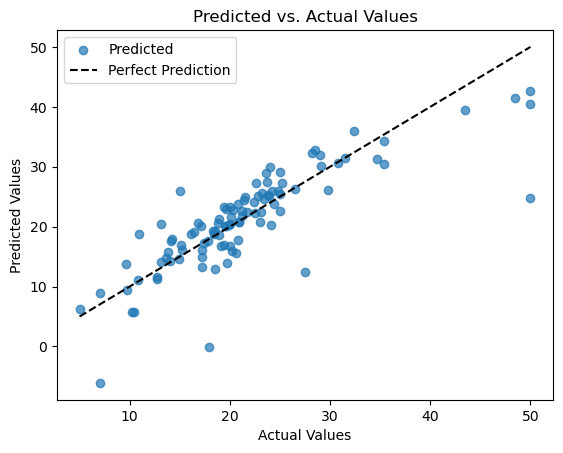

In [113]:
# Plotting the linear regression line

plt.scatter(y_test, predictions, alpha = 0.7, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '--', color = 'black', label = 'Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

* plt.scatter(y_test, predicted, alpha=0.7, label='Predicted'): This line creates a scatter plot. It plots the actual target values (y_test) on the x-axis and the predicted values (predicted) on the y-axis. The alpha parameter controls the transparency of the data points, and the label is used for the legend.

* plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction'): This line plots a red dashed line that represents a perfect prediction. The line goes from the minimum to the maximum values of the actual target (y_test). The linestyle is set to a dashed line, and the label is used for the legend.



In [114]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': predictions
})

results_df.head(10)

,Actual Values,Predicted Values
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880
5,20.0,23.254429
6,17.8,17.662538
7,14.0,14.341190
8,19.6,23.013207
9,16.8,20.632456


* results_df = pd.DataFrame({ ... }): This line creates a pandas DataFrame named results_df by providing a dictionary where keys are column names, and values are the corresponding data to be stored in those columns. In this case, you are creating two columns: "Actual Values" and "Predicted Values."

* 'Actual Values': y_test.values and 'Predicted Values': cv_predictions assign the actual target values from y_test and the predicted values from cv_predictions to the respective columns in the DataFrame.



In [115]:
# Make predictions on unseen data 

new_data = np.array([[0.02731, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98]])
predicted_value = model.predict(new_data)
print(f"Predicted Value: {predicted_value[0]:.2f}")

Predicted Value: 29.95


c:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



### Polynomial Regression

Polynomial regression is an extension of linear regression that allows you to model relationships between variables using higher-degree polynomial functions. 

In [77]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [79]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [80]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [81]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

At this stage, we are splitting the dataset into the training and testing set. The training set will be used in training the machine learning model. The machine learning model's job is to identify hidden patterns in the data.

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

The lin_reg variable name is assigned to the imported LinearRegression model. This model is fitted into the trainig set of the dataset so as to identify the hidden pattern in the data.

In [83]:
# Training the Linear Regression model on the whole dataset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

Here, the imported PolynomialFeatures module is converting the input data into a 4th degree polynomial.

In [93]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x)

The converted input data can then be splitted

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 0)

In [95]:
new_model = LinearRegression()
new_model.fit(x_train, y_train)

LinearRegression()

In [96]:
new_model.coef_

array([     0.        , 175949.46161637, -47713.86152347,   4108.01381927])

In [97]:
new_model.intercept_

-109540.13199914352

In [88]:
y_pred = new_model.predict(x_test)

In [89]:
mse = mean_squared_error(y_test, y_pred)
mse

14254734714.329048

In [90]:
rvalue = r2_score(y_test, y_pred)
rvalue

0.7054806877204742

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1487932926.80683
R-squared: 0.9692575841568837


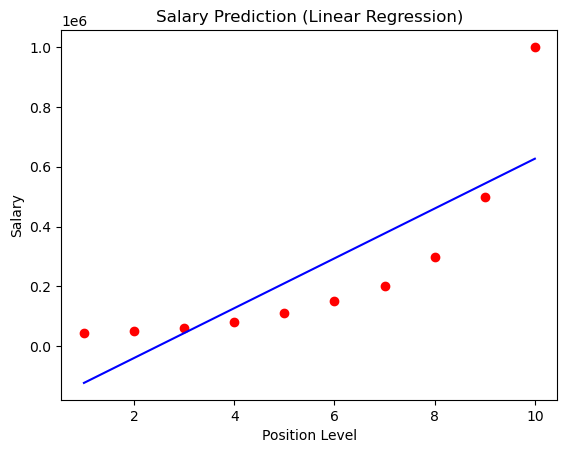

In [62]:
# Visualising the Linear Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Salary Prediction (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

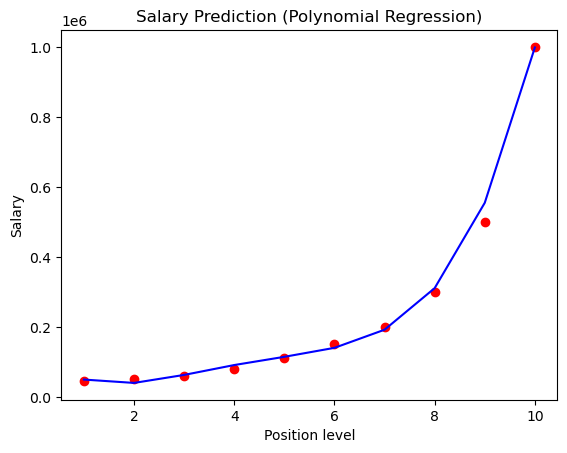

In [60]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

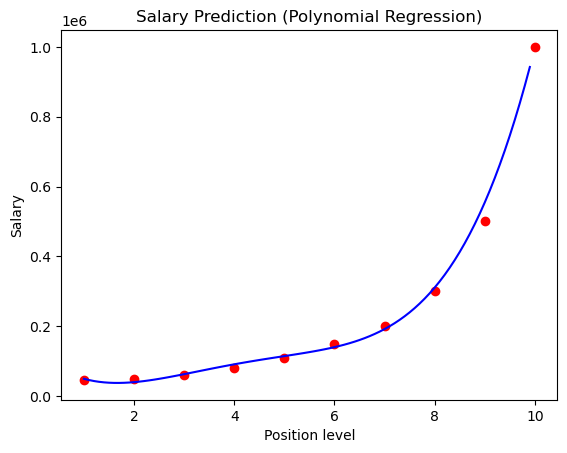

In [63]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [58]:
# Predicting a new result with Linear Regression
lin_reg.predict([[10]])

# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[10]]))

array([998396.28808593])